In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [10]:
df=pd.read_excel('http://taanila.fi/data1.xlsx',sheetname='Data')
df.head()

,nro,sukup,ikä,perhe,koulutus,palveluv,palkka,johto,työtov,työymp,palkkat,työteht,työterv,lomaosa,kuntosa,hieroja
0,1,1,38,1,1.0,22.0,3587,3,3.0,3,3,3,NaN,NaN,NaN,NaN
1,2,1,29,2,2.0,10.0,2963,1,5.0,2,1,3,NaN,NaN,NaN,NaN
2,3,1,30,1,1.0,7.0,1989,3,4.0,1,1,3,1.0,NaN,NaN,NaN
3,4,1,36,2,1.0,14.0,2144,3,3.0,3,3,3,1.0,NaN,NaN,NaN
4,5,1,24,1,2.0,4.0,2183,2,3.0,2,1,2,1.0,NaN,NaN,NaN


In [12]:
koulutus=['Peruskoulu','2.aste','Korkeakoulu','Ylempi korkeakoulu']
perhe=['Perheetön','Perheellinen']
sukup=['Mies','Nainen']

In [13]:
df.describe()

,nro,sukup,ikä,perhe,koulutus,palveluv,palkka,johto,työtov,työymp,palkkat,työteht,työterv,lomaosa,kuntosa,hieroja
count,82.000000,82.000000,82.000000,82.000000,81.000000,80.000000,82.000000,82.000000,81.000000,82.000000,82.000000,82.000000,47.0,20.0,9.0,22.0
mean,41.500000,1.231707,37.951220,1.621951,1.987654,12.175000,2563.878049,3.060976,4.061728,3.219512,2.109756,3.195122,1.0,1.0,1.0,1.0
std,23.815261,0.424519,9.773866,0.487884,0.844006,8.807038,849.350302,1.058155,0.826826,1.154961,1.111179,1.047502,0.0,0.0,0.0,0.0
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,1521.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.0,1.0,1.0,1.0
25%,21.250000,1.000000,31.000000,1.000000,1.000000,3.750000,2027.000000,2.000000,4.000000,3.000000,1.000000,3.000000,1.0,1.0,1.0,1.0
50%,41.500000,1.000000,37.500000,2.000000,2.000000,12.500000,2320.000000,3.000000,4.000000,3.000000,2.000000,3.000000,1.0,1.0,1.0,1.0
75%,61.750000,1.000000,44.000000,2.000000,3.000000,18.250000,2808.000000,4.000000,5.000000,4.000000,3.000000,4.000000,1.0,1.0,1.0,1.0
max,82.000000,2.000000,61.000000,2.000000,4.000000,36.000000,6278.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1.0,1.0,1.0,1.0


In [15]:
df[['ikä','palveluv','palkka']].describe().style.format('{:.2f}')

,ikä,palveluv,palkka
count,82.00,80.00,82.00
mean,37.95,12.18,2563.88
std,9.77,8.81,849.35
min,20.00,0.00,1521.00
25%,31.00,3.75,2027.00
50%,37.50,12.50,2320.00
75%,44.00,18.25,2808.00
max,61.00,36.00,6278.00


In [16]:
df[['ikä','palveluv','palkka']].describe()

,ikä,palveluv,palkka
count,82.000000,80.000000,82.000000
mean,37.951220,12.175000,2563.878049
std,9.773866,8.807038,849.350302
min,20.000000,0.000000,1521.000000
25%,31.000000,3.750000,2027.000000
50%,37.500000,12.500000,2320.000000
75%,44.000000,18.250000,2808.000000
max,61.000000,36.000000,6278.000000


In [18]:
df1=df.pivot_table(values='palkka', index=['sukup','perhe'],columns='koulutus')
df1

koulutus             1.0          2.0          3.0     4.0
sukup perhe                                               
1     1      2196.444444  2085.750000  2729.800000  5225.0
      2      2462.307692  2871.272727  3353.300000  5069.0
2     1      2223.000000  1715.000000  1872.000000     NaN
      2      2095.500000  2294.166667  2410.833333     NaN

In [20]:
df1=df.pivot_table(values='palkka', index=['sukup','perhe'],columns='koulutus')
df1.style.format('{:.0f}')

In [23]:
df1.index=df1.index.set_levels(sukup, level=0)
df1.style.format('{:.0f}')

In [24]:
df1.index=df1.index.set_levels(perhe,level=1)
df1

koulutus                     1.0          2.0          3.0     4.0
sukup  perhe                                                      
Mies   Perheetön     2196.444444  2085.750000  2729.800000  5225.0
       Perheellinen  2462.307692  2871.272727  3353.300000  5069.0
Nainen Perheetön     2223.000000  1715.000000  1872.000000     NaN
       Perheellinen  2095.500000  2294.166667  2410.833333     NaN

In [25]:
df1.index=df1.index.set_levels(perhe,level=1)
df1.columns=koulutus
df1.style.format('{:.0f}')

In [29]:
df2=df.pivot_table(values='palkka',index='koulutus',aggfunc=[np.min,np.median,np.mean,np.max])
df2.index=koulutus
df2.columns=['pienin','mediaani','keskiarvo','suurin']
df2.style.format('{:.0f}')

,pienin,mediaani,keskiarvo,suurin
Peruskoulu,1638,2144,2310,3587
2.aste,1521,2378,2403,3510
Korkeakoulu,1559,2710,2887,6278
Ylempi korkeakoulu,5069,5147,5147,5225


C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


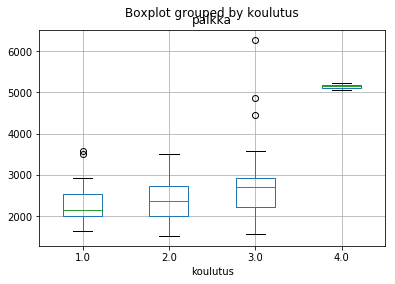

In [30]:
ax=df.boxplot('palkka',by='koulutus')


C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


[Text(0,0,'Peruskoulu'),
 Text(0,0,'2.aste'),
 Text(0,0,'Korkeakoulu'),
 Text(0,0,'Ylempi korkeakoulu')]

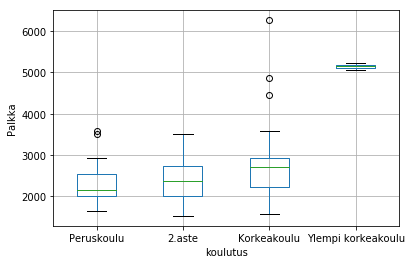

In [31]:
ax=df.boxplot('palkka',by='koulutus')
plt.title('')
plt.suptitle('')
plt.xlabel('koulutus')
plt.ylabel('Palkka')
ax.set_xticklabels(koulutus)

In [32]:
df[['ikä','palveluv','palkka']].corr()


,ikä,palveluv,palkka
ikä,1.000000,0.531559,0.296872
palveluv,0.531559,1.000000,0.243139
palkka,0.296872,0.243139,1.000000


In [34]:
df.corr().style.format('{:.2f}')

,nro,sukup,ikä,perhe,koulutus,palveluv,palkka,johto,työtov,työymp,palkkat,työteht,työterv,lomaosa,kuntosa,hieroja
nro,1.00,0.08,-0.07,0.03,-0.05,-0.15,-0.19,0.02,0.05,-0.07,-0.02,-0.03,nan,nan,nan,nan
sukup,0.08,1.00,0.15,0.25,0.08,0.14,-0.22,0.33,-0.15,0.35,0.34,0.17,nan,nan,nan,nan
ikä,-0.07,0.15,1.00,0.41,-0.16,0.53,0.30,0.12,0.08,0.10,0.07,0.19,nan,nan,nan,nan
perhe,0.03,0.25,0.41,1.00,0.05,0.35,0.24,0.21,0.09,0.28,0.21,0.32,nan,nan,nan,nan
koulutus,-0.05,0.08,-0.16,0.05,1.00,-0.15,0.42,0.14,-0.02,0.30,0.25,0.16,nan,nan,nan,nan
palveluv,-0.15,0.14,0.53,0.35,-0.15,1.00,0.24,0.07,0.02,0.13,0.00,0.14,nan,nan,nan,nan
palkka,-0.19,-0.22,0.30,0.24,0.42,0.24,1.00,0.17,0.12,0.27,0.31,0.31,nan,nan,nan,nan
johto,0.02,0.33,0.12,0.21,0.14,0.07,0.17,1.00,0.22,0.58,0.54,0.46,nan,nan,nan,nan
työtov,0.05,-0.15,0.08,0.09,-0.02,0.02,0.12,0.22,1.00,0.29,0.09,0.31,nan,nan,nan,nan
työymp,-0.07,0.35,0.10,0.28,0.30,0.13,0.27,0.58,0.29,1.00,0.54,0.58,nan,nan,nan,nan


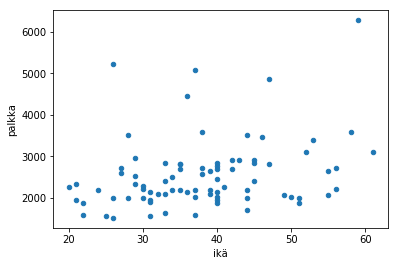

In [35]:
df.plot.scatter('ikä','palkka')